'\nsl = slice(0,10)\ndf = df.loc[sl]\nreg2 = UncRegression(df.t, df.C)\nax = reg2.plot(ax = ax)\n'

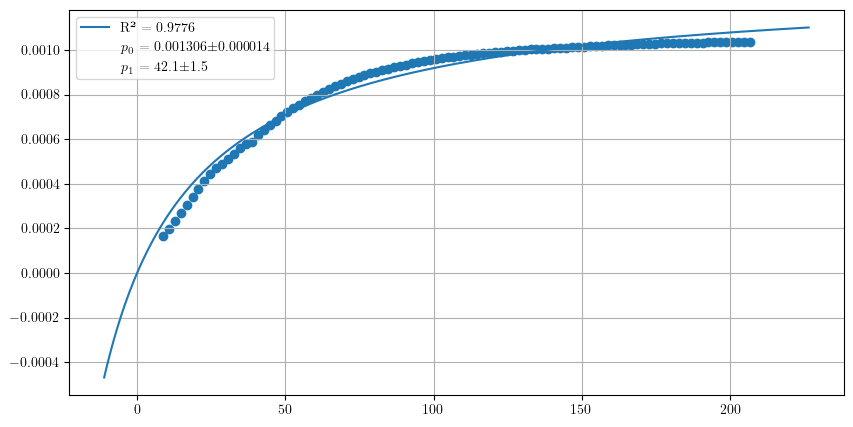

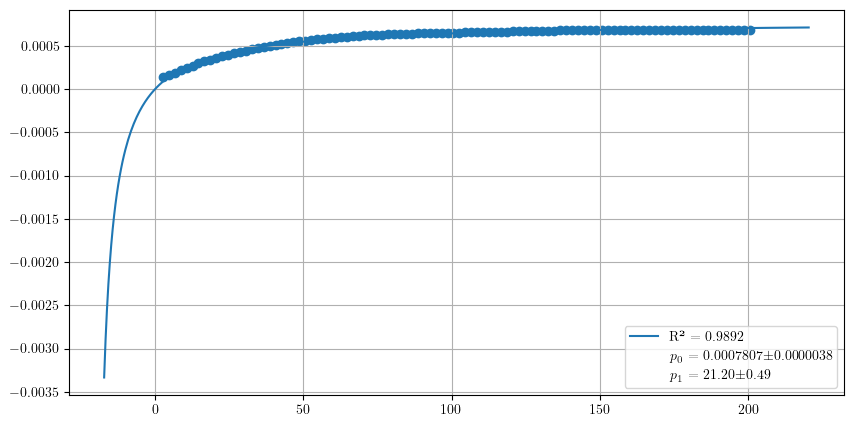

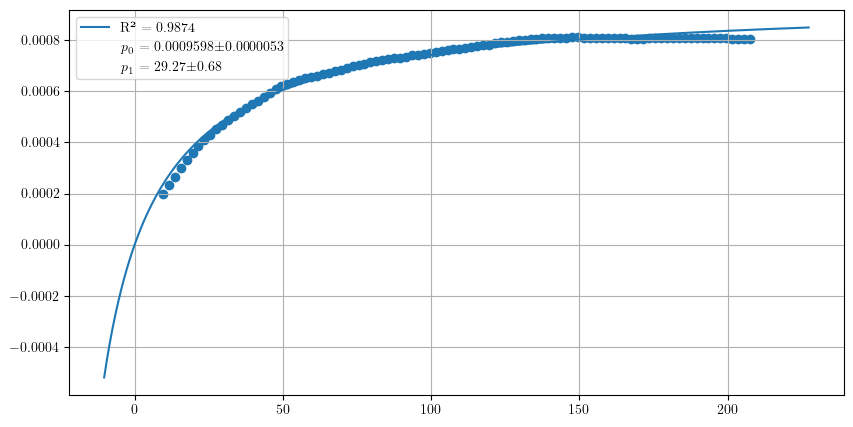

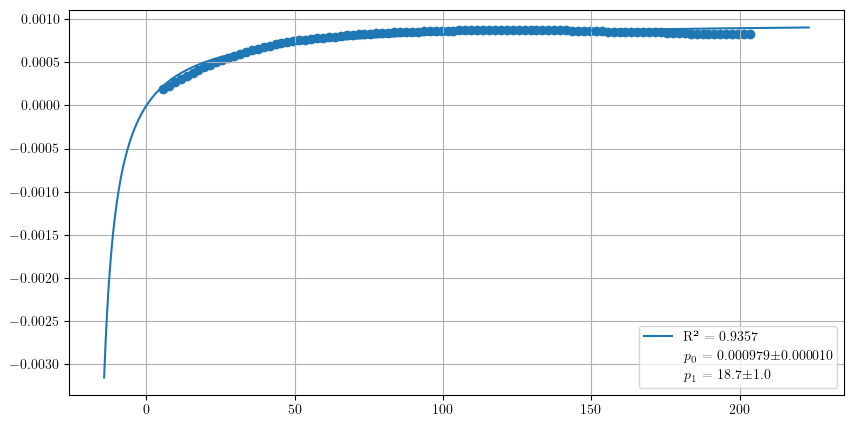

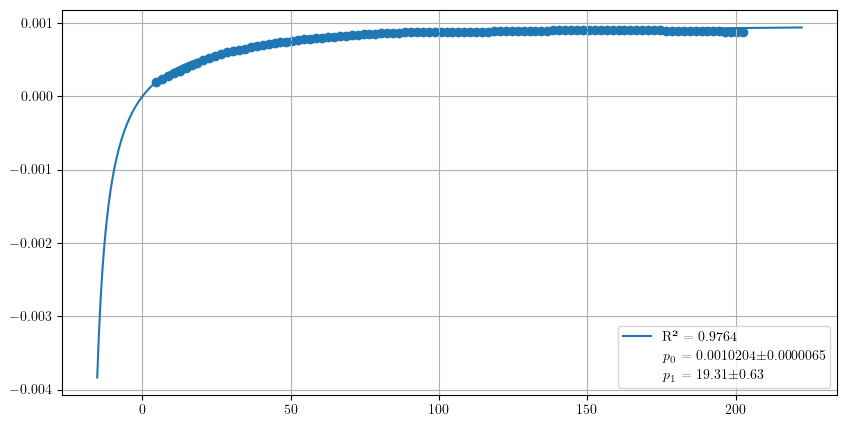

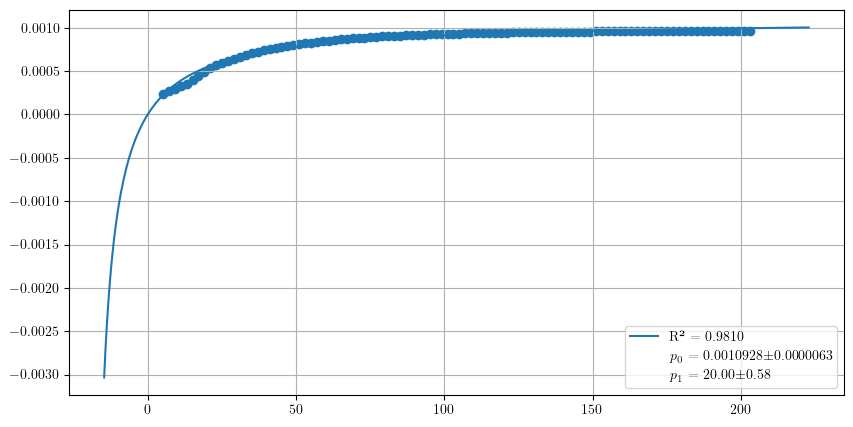

In [21]:
from unc_tools import UncRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def func(x, a,b):
        return a*x / (x +b)

UncRegression.latex_style()

t0 = [8.7, 2.62, 9.51, 5.53, 4.55, 5.1]

for i in range(1,7):

    df = pd.read_csv(f"{i}.csv").loc[1:]


    df["D"] = [float(x.replace(",", "."))if type(x) == str  else x for x in df["D"]]
    df["C"] = df.D / 725
    df.t += t0[i-1]

    fig, ax = plt.subplots(figsize=(10,5))

    reg1 = UncRegression(df.t, df.C, func=func)
    ax = reg1.plot(ax = ax)
    plt.savefig(f"нелин/нелин{i}.png")
#    plt.text(f"Опыт {i}", 100, 0.005)
    
"""
sl = slice(0,10)
df = df.loc[sl]
reg2 = UncRegression(df.t, df.C)
ax = reg2.plot(ax = ax)
"""


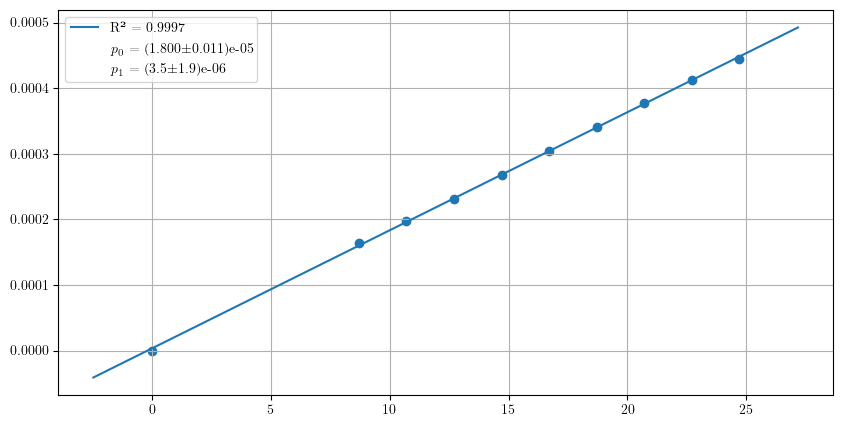

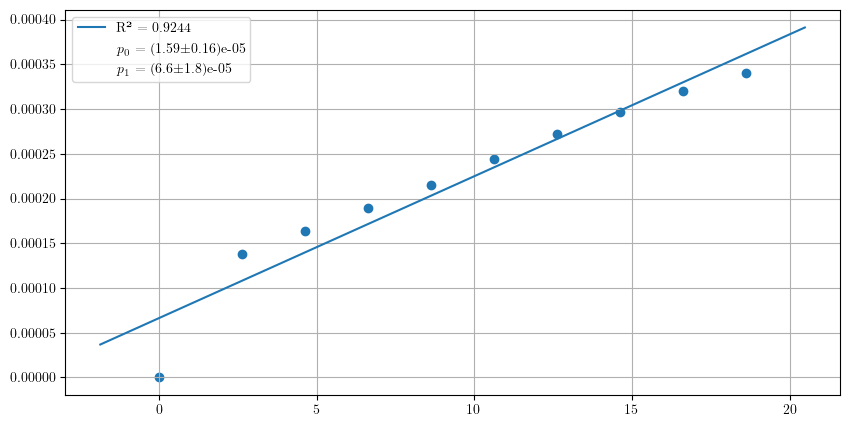

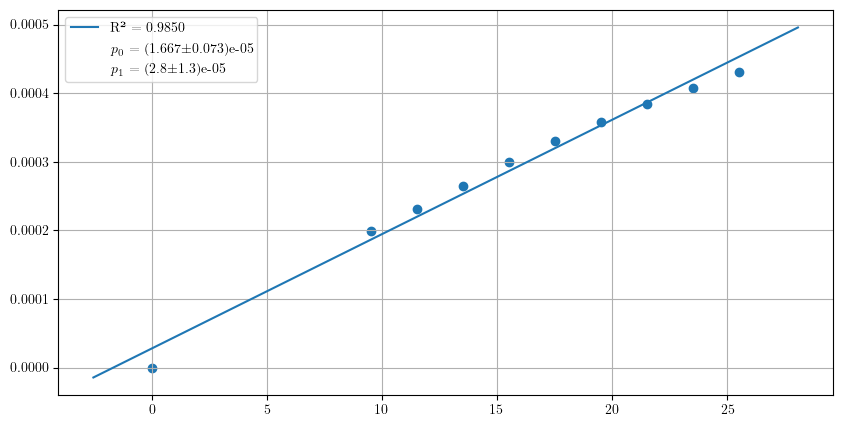

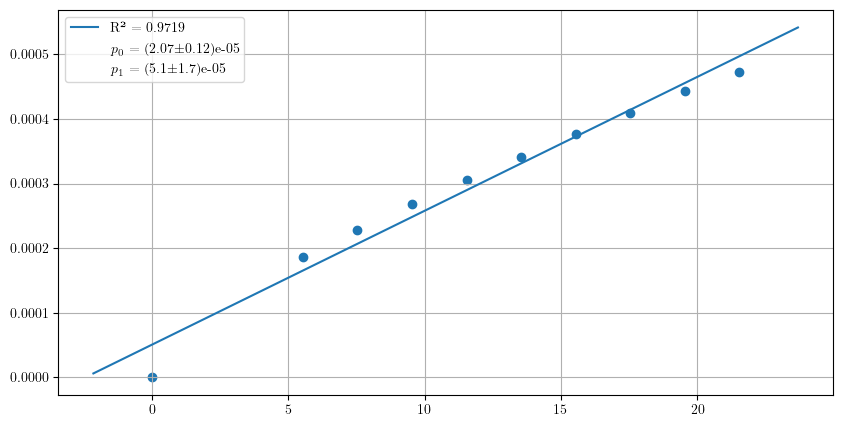

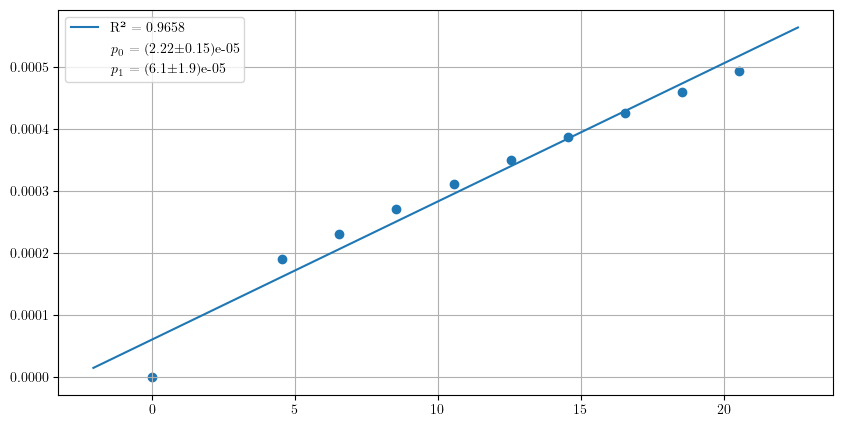

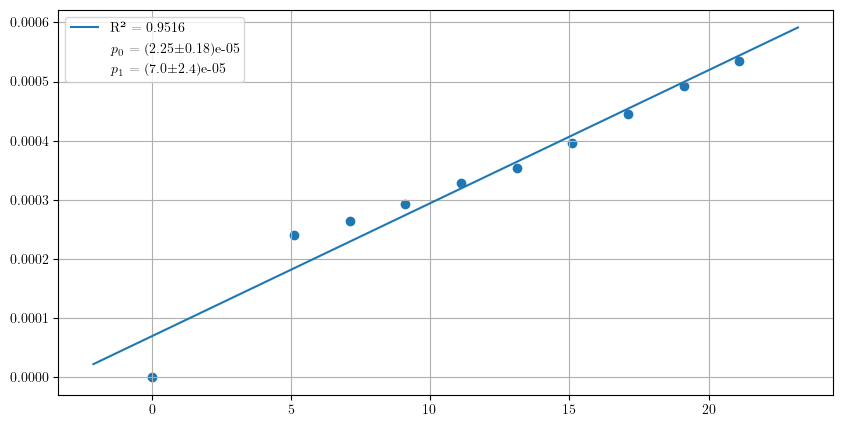

In [15]:
lin1 = []

for i in range(1,7):

    df = pd.read_csv(f"{i}.csv")


    df["D"] = [float(x.replace(",", "."))if type(x) == str  else x for x in df["D"]]
    df["C"] = df.D / 725
    df.t += t0[i-1]


    fig, ax = plt.subplots(figsize=(10,5))
    sl = slice(0,9)
    df = df.loc[sl]
    reg2 = UncRegression(df.t, df.C)
    lin1.append(reg2.coefs[0])
    ax = reg2.plot(ax = ax)
    plt.savefig(f"нелин/лин{i}_c_нулем.png")



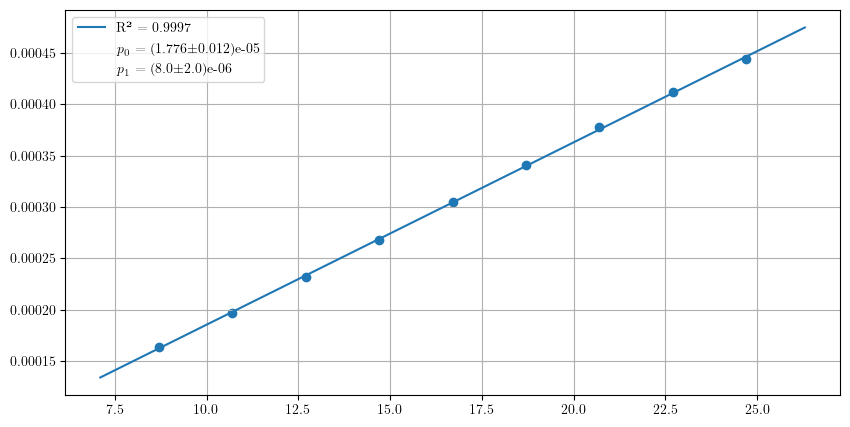

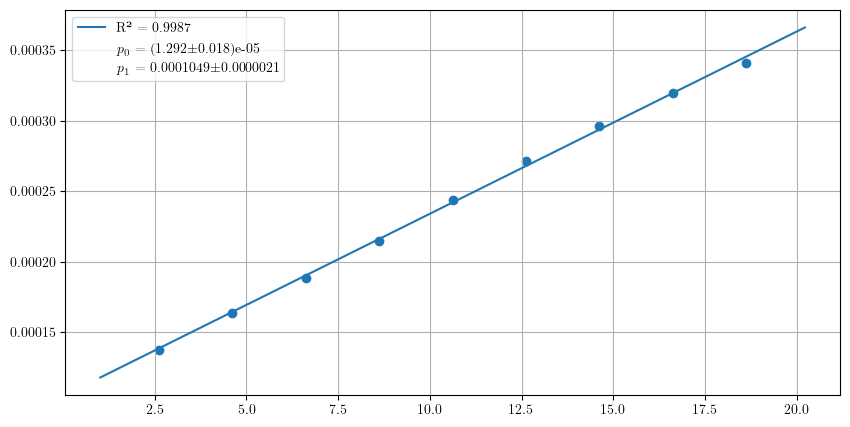

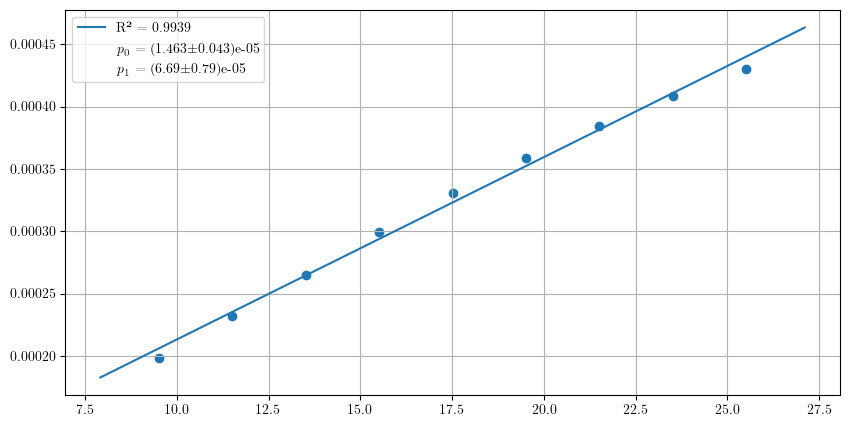

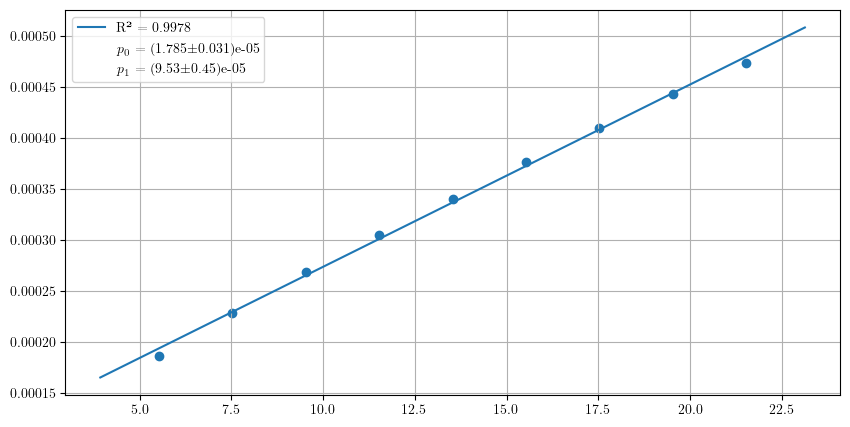

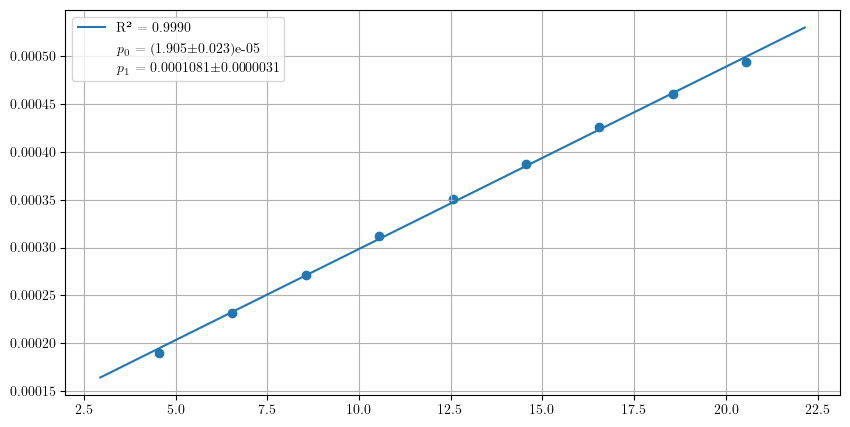

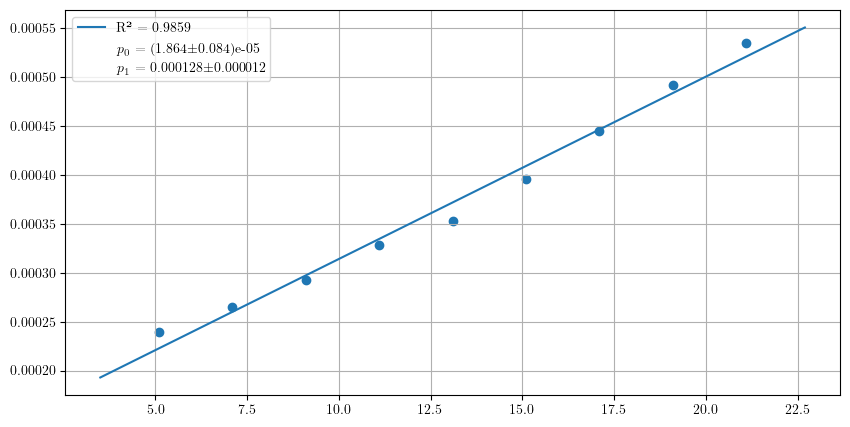

In [16]:
lin2 = []
for i in range(1,7):

    df = pd.read_csv(f"{i}.csv")


    df["D"] = [float(x.replace(",", "."))if type(x) == str  else x for x in df["D"]]
    df["C"] = df.D / 725
    df.t += t0[i-1]


    fig, ax = plt.subplots(figsize=(10,5))
    sl = slice(1,9)
    df = df.loc[sl]
    reg2 = UncRegression(df.t, df.C)
    lin2.append(reg2.coefs[0])
    ax = reg2.plot(ax = ax)
    plt.savefig(f"нелин/лин{i}_без_нуля.png")



Km = 0.00203+/-0.00010; rmax = (2.18+/-0.04)e-05
Km = 0.00203+/-0.00010; rmax = (2.18+/-0.04)e-05
Km = 0.00204+/-0.00009; rmax = (2.178+/-0.030)e-05
Km = 0.00204+/-0.00009; rmax = [2.1671375542842114e-05+/-3.496684155818899e-07]


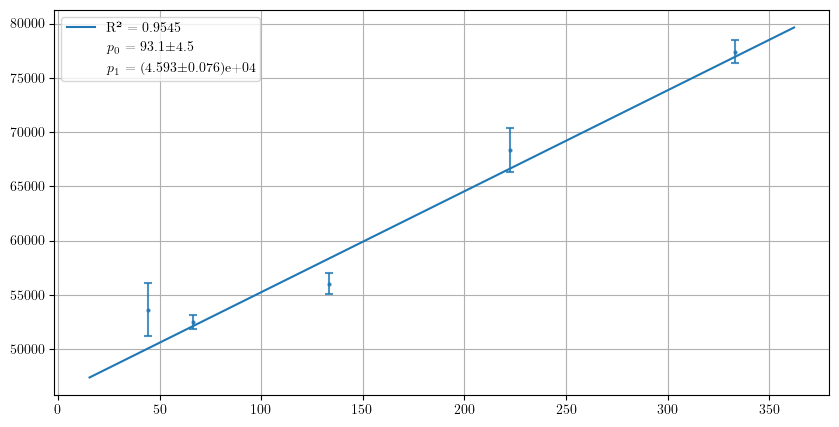

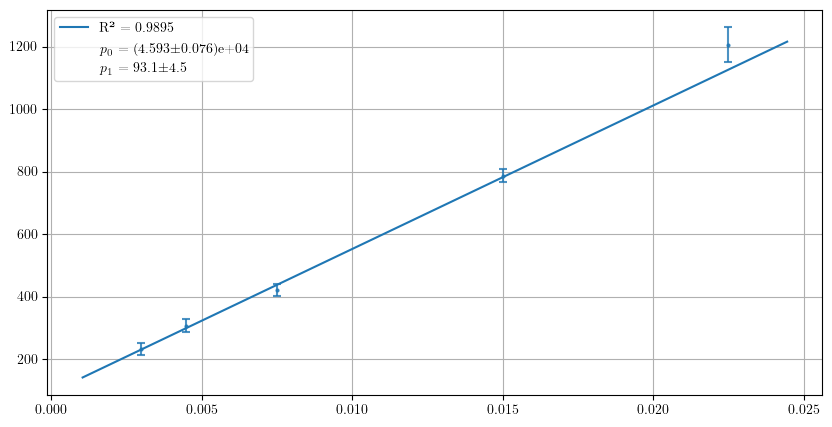

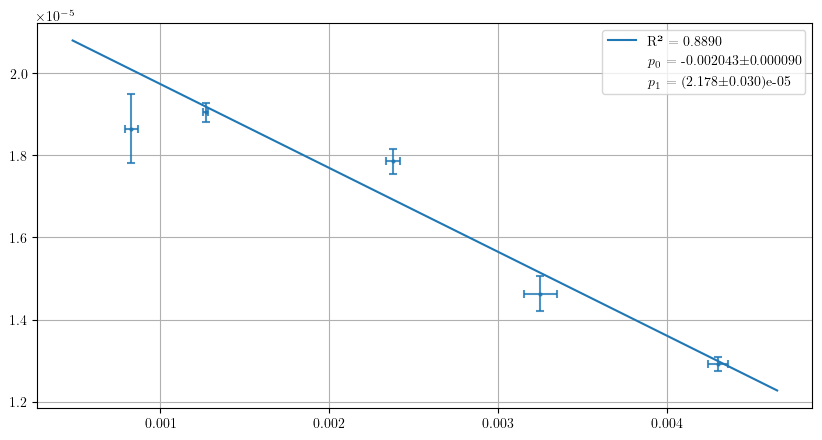

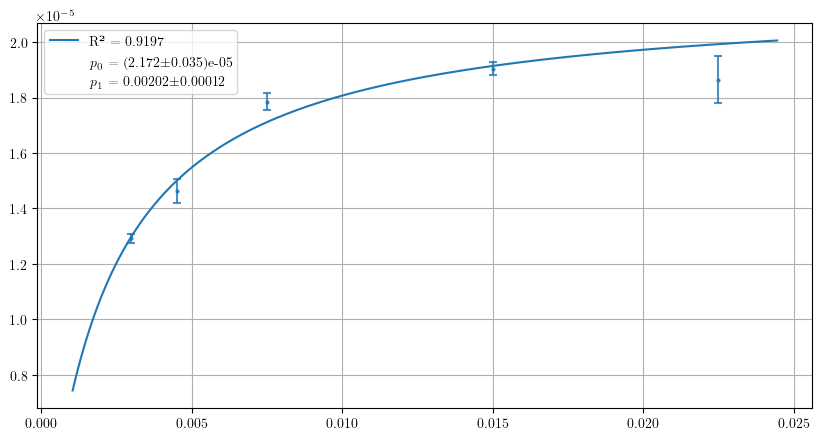

In [53]:
tags = pd.DataFrame({"S0":[0.0015,0.003,0.0045,0.0075,0.015,0.0225], "r0":lin2})


fig, ax = plt.subplots(figsize=(10,5))
tags = tags.loc[1:]
reg = UncRegression(1/tags.S0,1/tags.r0)
ax = reg.plot(ax = ax)
Km = reg.coefs[0]/reg.coefs[1]
rmax = Km/reg.coefs[0]
plt.savefig("нелин/")
print(f"Km = {Km}; rmax = {rmax}")


fig, ax = plt.subplots(figsize=(10,5))
tags = tags.loc[1:]
reg = UncRegression(tags.S0,tags.S0/tags.r0)
ax = reg.plot(ax = ax)
Km = reg.coefs[1]/reg.coefs[0]
rmax = 1/reg.coefs[0]
print(f"Km = {Km}; rmax = {rmax}")

fig, ax = plt.subplots(figsize=(10,5))
tags = tags.loc[1:]
reg = UncRegression(tags.r0/tags.S0,tags.r0)
ax = reg.plot(ax = ax)
Km = -reg.coefs[0]
rmax = reg.coefs[1]
print(f"Km = {Km}; rmax = {rmax}")

fig, ax = plt.subplots(figsize=(10,5))
tags = tags.loc[1:]
reg = UncRegression(tags.S0,tags.r0, func=lambda x, a, b: a*x/(b+x))
ax = reg.plot(ax = ax)
rmax = reg.predict_with_uncertainty(np.array([1]))
Km = rmax/2
print(f"Km = {Km}; rmax = {rmax}")

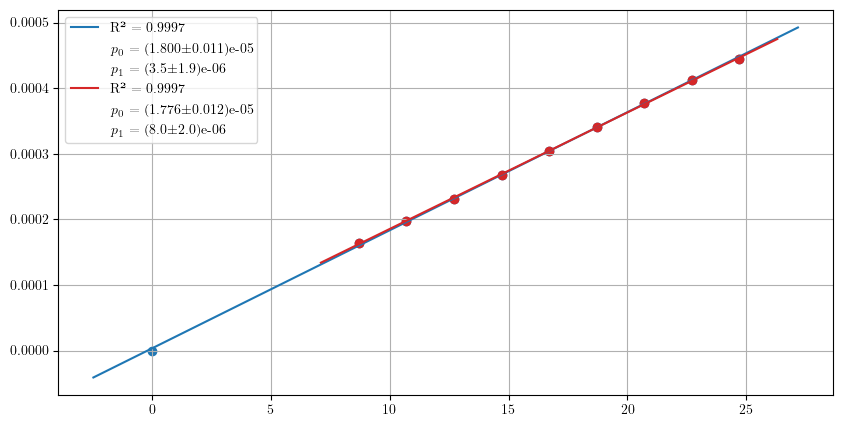

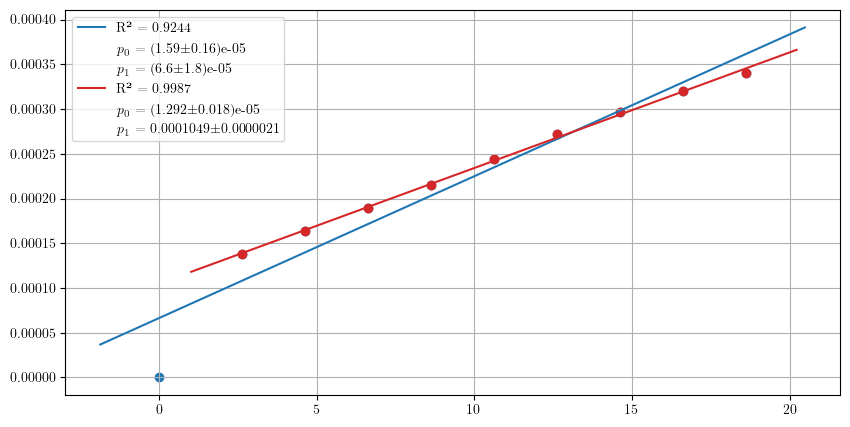

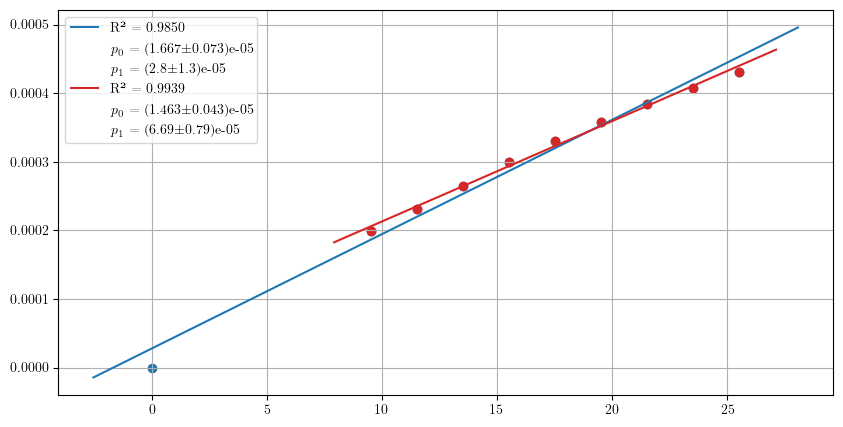

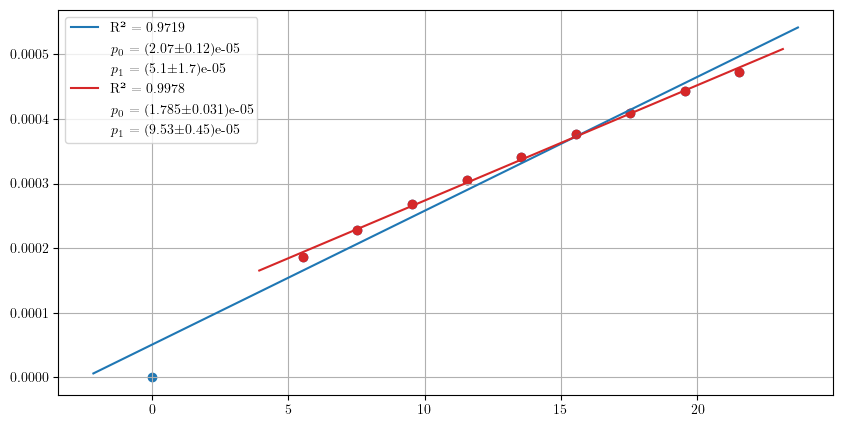

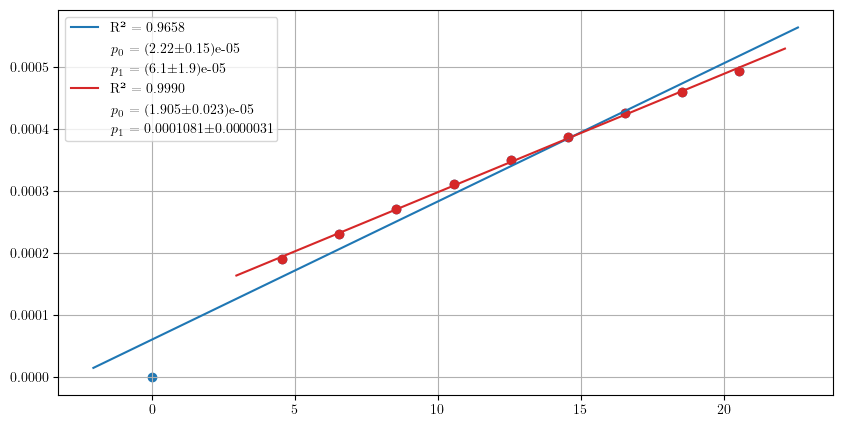

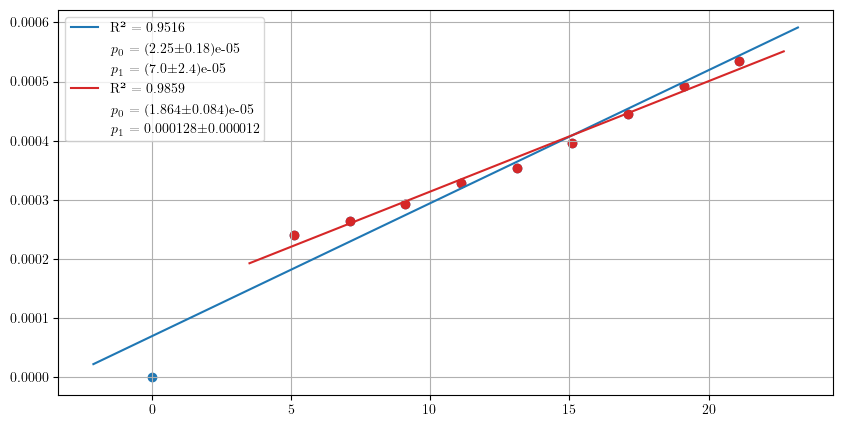

In [30]:
# ХУЙНЯ


lin1 = []

for i in range(1,7):

    df = pd.read_csv(f"{i}.csv")
    fig, ax = plt.subplots(figsize=(10,5))


    df["D"] = [float(x.replace(",", "."))if type(x) == str  else x for x in df["D"]]
    df["C"] = df.D / 725
    df.t += t0[i-1]


    sl = slice(0,9)
    df = df.loc[sl]
    reg2 = UncRegression(df.t, df.C)
    lin1.append(reg2.coefs[0])
    ax = reg2.plot(ax = ax)
    sl = slice(1,9)
    df = df.loc[sl]
    reg2 = UncRegression(df.t, df.C)
    lin1.append(reg2.coefs[0])
    ax = reg2.plot(ax = ax)


